In [1]:
from matplotlib import pyplot as plt
from graph import create_random_graph , to_useful, assign_states
import networkx as nx
from model import create_model
import tensorflow as tf

2023-12-01 06:16:40.090288: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 06:16:40.123480: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 06:16:40.123517: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 06:16:40.124867: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 06:16:40.130911: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 06:16:40.131791: I tensorflow/core/platform/cpu_feature_guard.cc:1

input


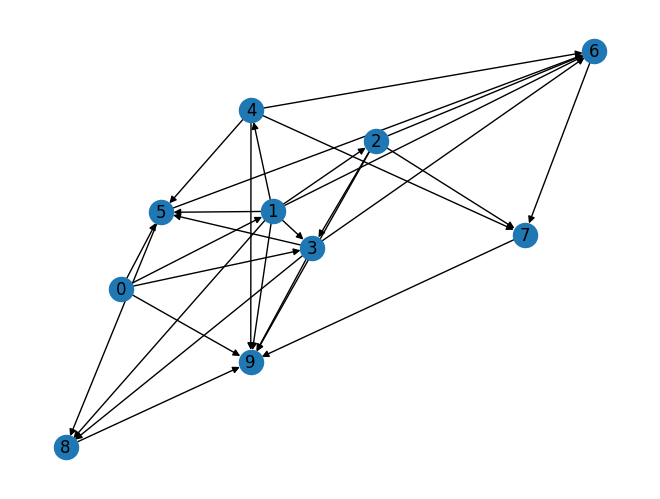

In [2]:
g1 = create_random_graph(5,0.5)
g1 = assign_states(g1,(1,3,1))
print(g1.nodes[0]['state'])
nx.draw(g1, with_labels=True)
plt.draw()

'output'

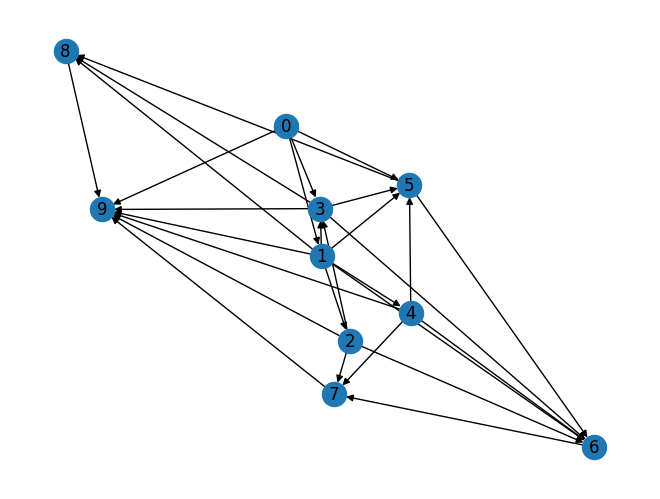

In [3]:
g1 = to_useful(g1,(1,3,1))
nx.draw(g1, with_labels=True)
plt.draw()
g1.edges(data=True)

In [4]:
g1.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [5]:
import mnist
import numpy as np
import matplotlib.pyplot as plt

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
train_images = (train_images / 255) 
test_images = (test_images / 255) 
train_images = train_images[:10000]
train_labels = train_labels[:10000]
test_images = test_images[:10000]
test_labels = test_labels[:10000]
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [6]:
model = create_model(g1,(28,28,1),10)

[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '9')>]


In [7]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 1 (Dropout)                 (None, 28, 28, 1)            0         ['input_layer[0][0]']         
                                                                                                  
 2 (Dropout)                 (None, 28, 28, 1)            0         ['1[0][0]']                   
                                                                                                  
 3_concatenate (Concatenate  (None, 28, 28, 3)            0         ['input_layer[0][0]',         
 )                                                                   '1[0][0]',               

In [9]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
model.fit(train_images, train_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/10


157/157 [==============================] - 48s 296ms/step - loss: 10.9999 - accuracy: 0.6358
Epoch 2/10
157/157 [==============================] - 44s 280ms/step - loss: 0.5377 - accuracy: 0.8625
Epoch 3/10
157/157 [==============================] - 43s 272ms/step - loss: 0.6079 - accuracy: 0.8534
Epoch 4/10
157/157 [==============================] - 44s 277ms/step - loss: 0.6118 - accuracy: 0.8671
Epoch 5/10
157/157 [==============================] - 45s 284ms/step - loss: 0.8436 - accuracy: 0.8551
Epoch 6/10
157/157 [==============================] - 46s 290ms/step - loss: 0.6226 - accuracy: 0.8884
Epoch 7/10
157/157 [==============================] - 44s 278ms/step - loss: 0.8226 - accuracy: 0.8731
Epoch 8/10
157/157 [==============================] - 44s 279ms/step - loss: 0.7689 - accuracy: 0.8899
Epoch 9/10
 88/157 [===============>..............] - ETA: 19s - loss: 0.6894 - accuracy: 0.8842

KeyboardInterrupt: 